<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [21]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [4]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)
pd.set_option('display.max_columns', None)
#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


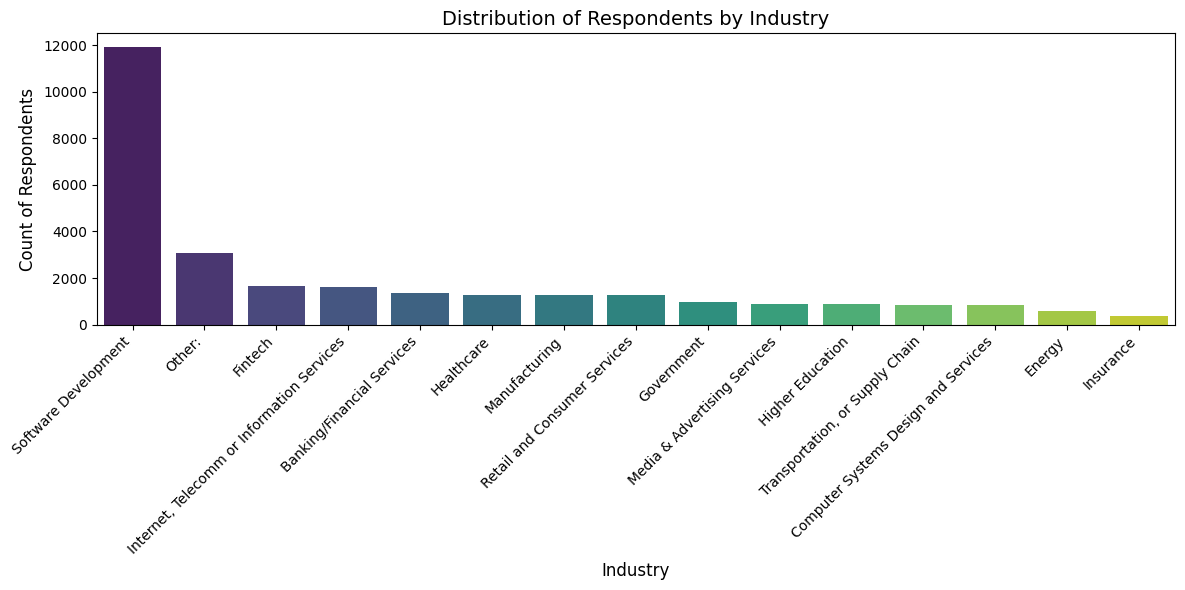

In [7]:
##Write your codeimport matplotlib.pyplot as plt



# Count occurrences of each industry
industry_counts = df['Industry'].value_counts()

# Set up the figure with a larger size to fit all labels
plt.figure(figsize=(12, 6))  # Increased width

# Create the bar plot with hue as the category
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis', hue=industry_counts.index, legend=False)

# Add labels and title
plt.title('Distribution of Respondents by Industry', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Count of Respondents', fontsize=12)

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')  # 'ha' aligns labels to the right

# Show the plot
plt.tight_layout()
plt.show()


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [14]:
##Write your code here

# Replace missing values of 'ConvertedCompYearly' with its mean
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].mean())
df['ConvertedCompYearly'].isnull().sum()

#  basic statistics for 'ConvertedCompYearly'
mean_value = df['ConvertedCompYearly'].mean()
median_value = df['ConvertedCompYearly'].median()
std_dev_value = df['ConvertedCompYearly'].std()

# Print the results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_dev_value}")




Mean: 86155.28726264133
Median: 86155.28726264134
Standard Deviation: 111761.3572523415


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [15]:
##Write your code here# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'ConvertedCompYearly' column
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers (values outside the bounds)
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# Print the results
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of outliers: {outliers.shape[0]}")

# Optionally, show the outliers
print(outliers[['ConvertedCompYearly']].head())


IQR: 0.0
Lower Bound: 86155.28726264134
Upper Bound: 86155.28726264134
Number of outliers: 23435
     ConvertedCompYearly
72                7322.0
374              30074.0
379              91295.0
385              53703.0
389             110000.0


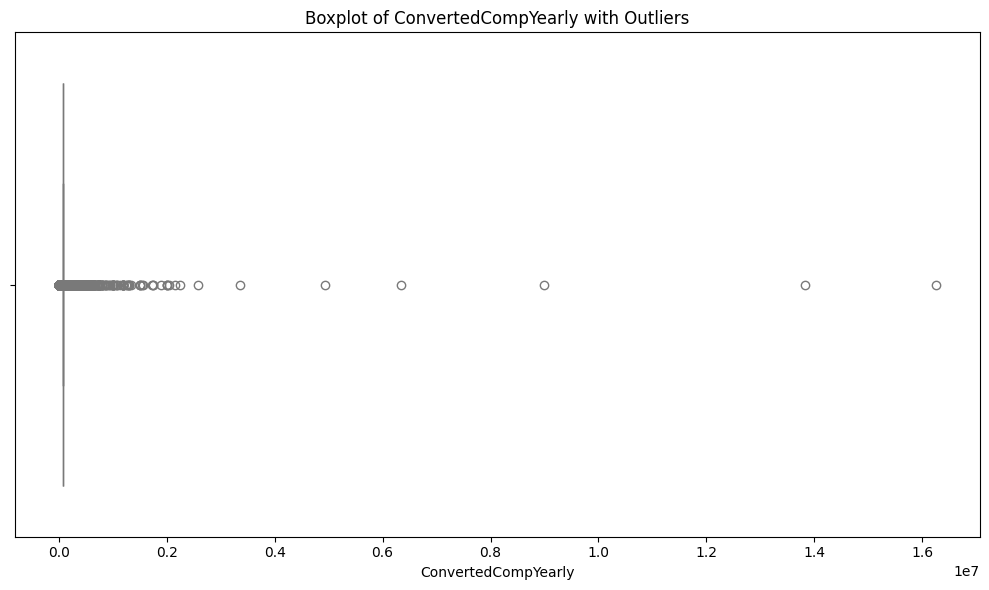

In [18]:


# Count the number of outliers
outliers_count = outliers.shape[0]


# Boxplot to visualize the distribution and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedCompYearly'], color='lightblue')

# Add labels and title
plt.title('Boxplot of ConvertedCompYearly with Outliers')
plt.xlabel('ConvertedCompYearly')

# Show the plot
plt.tight_layout()
plt.show()


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [17]:
##Write your code here
# Create a new DataFrame  with no outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Validate the size of the new DataFrame
print(f"Original DataFrame size: {df.shape}")
print(f"New DataFrame size (without outliers): {df_no_outliers.shape}")


Original DataFrame size: (65437, 114)
New DataFrame size (without outliers): (42002, 114)


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [23]:
##Write your code here
!pip install numpy
import numpy as np
#check your data
df['Age'].unique()
# Map the  Age categories to approximate numeric values
age_mapping = {
    'Under 18 years old': 17,            # assuming the upper bound for 'Under 18' is 17
    '18-24 years old': 21,               # mid-point of the range 18-24
    '25-34 years old': 29,               
    '35-44 years old': 39,               
    '45-54 years old': 49,              
    '55-64 years old': 59,              
    '65 years or older': 67,             # assuming the lower bound for '65+' is 67
    'Prefer not to say': np.nan         
}

# Map Age column to numeric values using the dictionary
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Check the transformation
print(df[['Age', 'AgeNumeric']].head())


                  Age  AgeNumeric
0  Under 18 years old        17.0
1     35-44 years old        39.0
2     45-54 years old        49.0
3     18-24 years old        21.0
4     18-24 years old        21.0


In [25]:
# Selecting  only numerical columns for correlation calculation
numeric_columns = df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for numeric columns only
correlation_matrix = df[numeric_columns].corr()

# Focus on the correlation of 'AgeNumeric' with other numerical columns
age_correlation = correlation_matrix['AgeNumeric'].sort_values(ascending=False)

# Print the correlation of AgeNumeric with other numerical columns
print(age_correlation)


AgeNumeric             1.000000
WorkExp                0.852122
JobSat                 0.069654
ConvertedCompYearly    0.064601
CompTotal             -0.002837
JobSatPoints_1        -0.028162
ResponseId            -0.037742
JobSatPoints_8        -0.046240
JobSatPoints_6        -0.050723
JobSatPoints_4        -0.075945
JobSatPoints_9        -0.081827
JobSatPoints_7        -0.082505
JobSatPoints_5        -0.101593
JobSatPoints_11       -0.107168
JobSatPoints_10       -0.114354
Name: AgeNumeric, dtype: float64


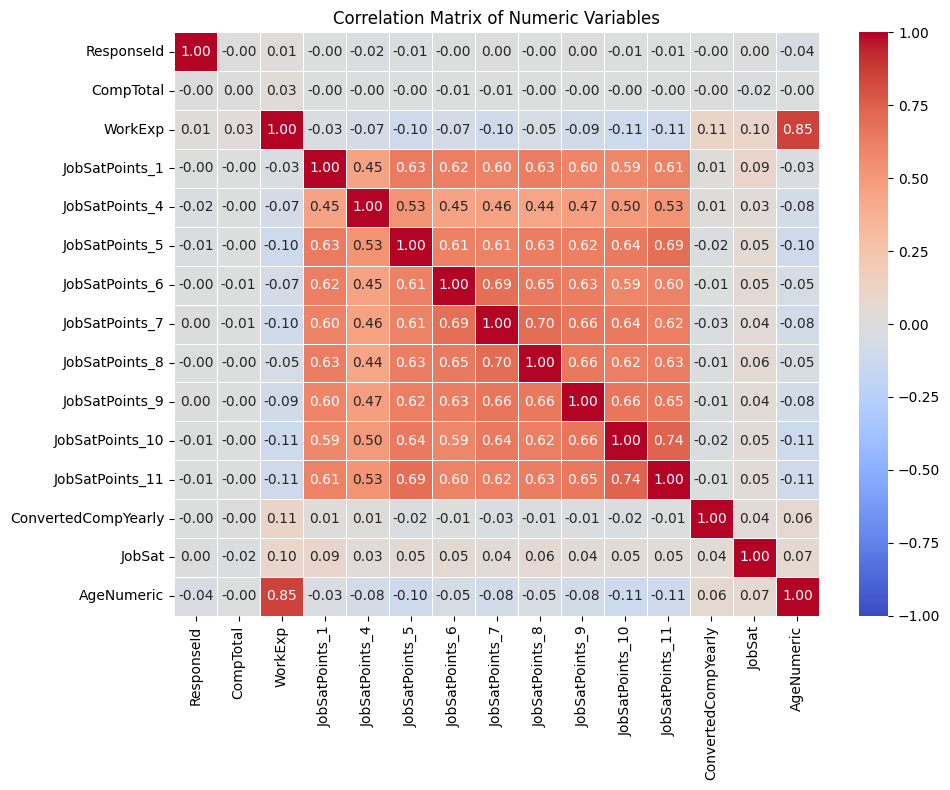

In [26]:
#  a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Adding a title and display the plot
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
